In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import arff

In [2]:
data = arff.loadarff("toy-train.arff")
dataFrame = pd.DataFrame(data[0])

In [3]:
# 2 measurements per second.
totalSecond = len(dataFrame) / 2
print("Seconds in total:", totalSecond)
# If I assume each lap takes same amount of time, then
lapSecond = totalSecond / 8
print("Length of each lap in seconds:", lapSecond)
print("Length of 1st two laps in seconds:", 2 * lapSecond)

Seconds in total: 1167.5
Length of each lap in seconds: 145.9375
Length of 1st two laps in seconds: 291.875


Since only measurement rate won't be reliable enough to find out the lap times, we can pay attention to the fact that there is only one bridge in the road.

Eight peaks in the gyro_pitch and gyro_yaw refers to eight laps. Let's look at them more closely and try to split the first two laps.

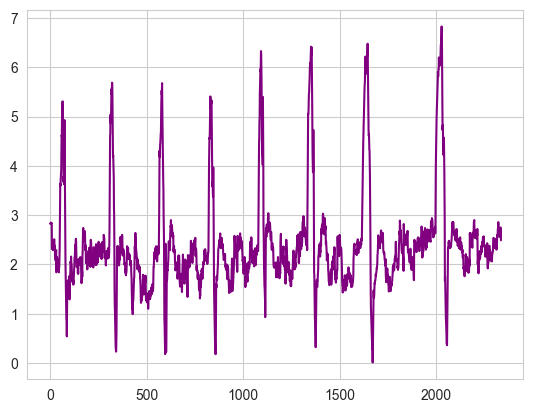

In [4]:
plt.plot(dataFrame.index, dataFrame['gyro_pitch'], color="purple")
plt.show()

The above figure shows the behaviour of gyro pitch in terms of time. Because of to the bridge in the middle of the rail, a sharp change is expected in gyro pitch values.

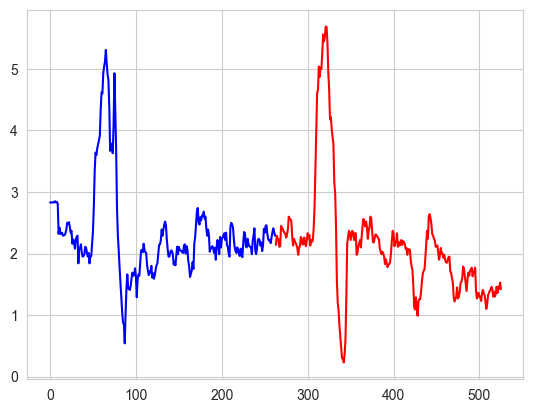

In [5]:
plt.plot(dataFrame.index[:263], dataFrame['gyro_pitch'][:263], color="blue")
plt.plot(dataFrame.index[263:526], dataFrame['gyro_pitch'][263:526], color='red')
plt.show()

In [6]:
firstMax = dataFrame['gyro_pitch'][0:250].idxmax()
print("The index of the first maximum is", firstMax)

secondMax = dataFrame.gyro_yaw[250:500].idxmax()
print("The index of the second maximum is", secondMax)

endFirstLap = secondMax - firstMax
print("The index of the end of the first lap is", endFirstLap)

secondFirstLap = secondMax + (endFirstLap - firstMax)
print("The index of the end of the second lap is", secondFirstLap)

The index of the first maximum is 65
The index of the second maximum is 328
The index of the end of the first lap is 263
The index of the end of the second lap is 526


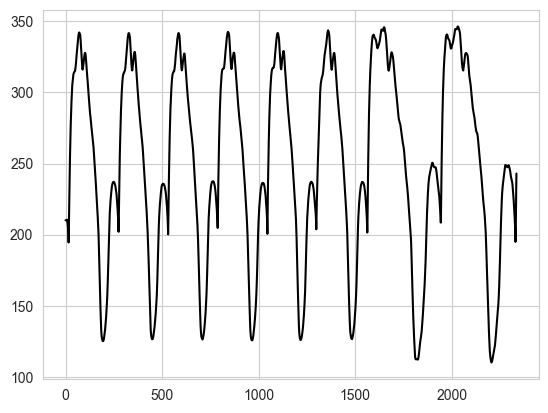

In [7]:
plt.plot(dataFrame.index, dataFrame['gyro_yaw'], color="black")
plt.show()

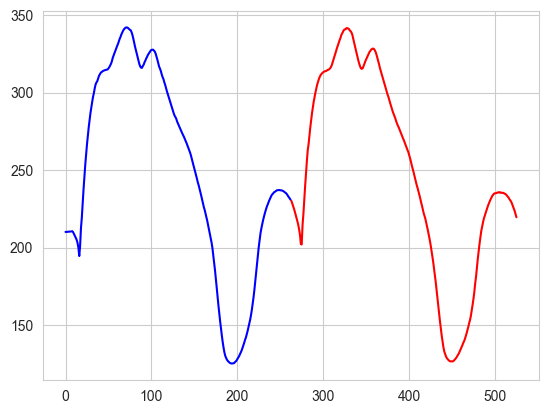

In [8]:
plt.plot(dataFrame.index[:263], dataFrame['gyro_yaw'][:263], color='blue')
plt.plot(dataFrame.index[263:526], dataFrame['gyro_yaw'][263:526], color='red')
plt.show()

# Reasonable error range for gyro yaw
The first two laps refer to the healthy situation, there is a difference between the two laps which I call it as reasonable difference. To find it I compare the data from the first lap and the second lap.

So far, I've established that the first lap should finish around step 263.
But in the following I use 260 instead of 263 because otherwise the difference between the two laps becomes larger.

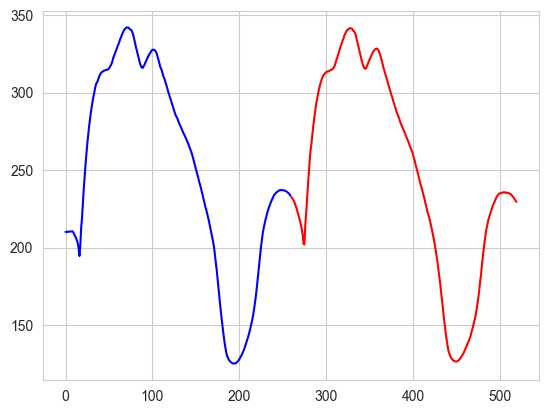

In [9]:
plt.plot(dataFrame.index[:260], dataFrame['gyro_yaw'][:260], color='blue')
plt.plot(dataFrame.index[260:520], dataFrame['gyro_yaw'][260:520], color='red')
plt.show()

In [10]:
# difference between gyro_yaw of the first two laps
delta = abs(dataFrame['gyro_yaw'][:260] - dataFrame['gyro_yaw'][260:520].reset_index(drop=True))

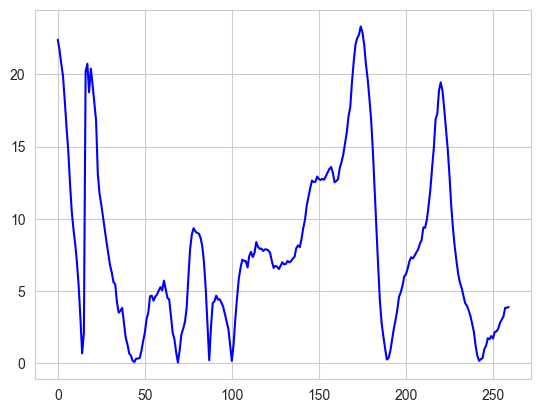

In [11]:
plt.plot(delta, color='blue')
plt.show()

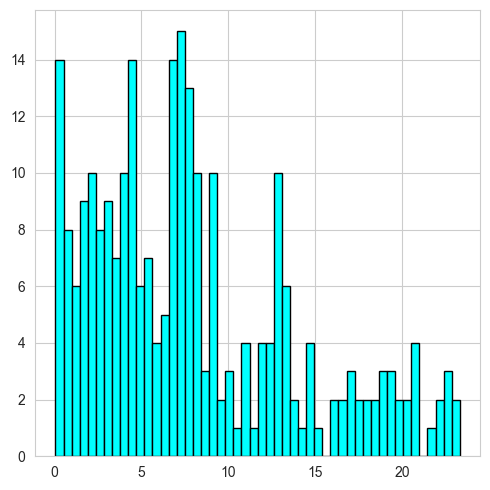

In [12]:
# To find the distribution of difference between the first two laps, I look at the distribution of the difference
delta.hist(bins=50, figsize=(5, 5), color='cyan', edgecolor='black')
plt.tight_layout()
plt.show()

From the above figure, I deduced that the difference of less and equal to 7 is ok and shows that train is in the healthy situation.